## CS/ECE/ME532 Period 10 Activity

Estimated Time:

P1: 25 mins

P2: 25 mins

### Preambles

In [ ]:
import numpy as np # numpy
import math
from scipy.io import loadmat # load & save data
from scipy.io import savemat
import matplotlib.pyplot as plt # plot
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})

### Q1. $K$-means
Let $\boldsymbol{A} = \left[ \begin{array}{cccccc} 3 & 3 & 3 & -1 & -1 & -1\\ 1 & 1 & 1 & -3 & -3 & -3 \\ 1 & 1 & 1 & -3 & -3 & -3 \\3 & 3 & 3 & -1 & -1 & -1 \end{array} \right]$.   Use the provided script to help you complete the problem.

In [ ]:
A = np.array([[3,3,3,-1,-1,-1],[1,1,1,-3,-3,-3],[1,1,1,-3,-3,-3],[3,3,3,-1,-1,-1]], float)
rows, cols = A.shape
print('A = \n', A)

A = 
 [[3.00 3.00 3.00 -1.00 -1.00 -1.00]
 [1.00 1.00 1.00 -3.00 -3.00 -3.00]
 [1.00 1.00 1.00 -3.00 -3.00 -3.00]
 [3.00 3.00 3.00 -1.00 -1.00 -1.00]]


#### a) Understand the following implementation of the k-means algorithm and fill in the blank to define the distance function.

In [ ]:
def dist(x, y):
    """
    this function takes in two 1-d numpy as input an outputs 
    Euclidean the distance between them
    """
    distance = 0
    for i in range(len(x)):
      distance += (x[i]-y[i])**2
    math.sqrt(distance)

    return distance ## Fill in the blank: Recall the 'distance' function used in
                    ## the kMeans algorithm

def kMeans(X, K, maxIters = 20):
    """
    this implementation of k-means takes as input (i) a matrix X
    (with the data points as columns) (ii) an integer K representing the number 
    of clusters, and returns (i) a matrix with the K columns representing 
    the cluster centers and (ii) a list C of the assigned cluster centers
    """
    X_transpose = X.transpose()
    centroids = X_transpose[np.random.choice(X.shape[0], K)]
    for i in range(maxIters):
        # Cluster Assignment step
        C = np.array([np.argmin([dist(x_i, y_k) for y_k in centroids]) for x_i in X_transpose])
        # Update centroids step 
        for k in range(K):
            if (C == k).any():
                centroids[k] = X_transpose[C == k].mean(axis = 0) 
            else: # if there are no data points assigned to this certain centroid
                centroids[k] = X_transpose[np.random.choice(len(X))] 
    return centroids.transpose() , C

#### b) Use the $K$-means algorithm to represent the columns of $\boldsymbol{A}$ with a single cluster.

In [ ]:
# k-means with 1 cluster
centroids, C = kMeans(A, 1) ## Fill in the blank: call the "kMeans" algorithm with proper input arguments
print('A = \n', A)
print('centroids = \n', centroids)
print('centroid assignment = \n', C)

A = 
 [[3.00 3.00 3.00 -1.00 -1.00 -1.00]
 [1.00 1.00 1.00 -3.00 -3.00 -3.00]
 [1.00 1.00 1.00 -3.00 -3.00 -3.00]
 [3.00 3.00 3.00 -1.00 -1.00 -1.00]]
centroids = 
 [[1.00]
 [-1.00]
 [-1.00]
 [1.00]]
centroid assignment = 
 [0 0 0 0 0 0]


#### c) Construct a matrix $\hat{A}_{r=1}$ whose i-th column is the centroid corresponding to the i-th column of $A$. Note that this can be viewed as a rank-1 approximation to $A$. Compare the rank-1 approximation to the original matrix and explain the nature of the approximation in terms of the properties of the K-means algorithm.

In [ ]:
# Construct rank-1 approximation using cluster
A_hat_1 = np.array([[1,1,1,1,1,1],
                    [-1,-1,-1,-1,-1,-1],
                    [-1,-1,-1,-1,-1,-1],
                    [1,1,1,1,1,1]], float) # Fill in the blank
print('Rank-1 Approximation, \n A_hat_1 = \n', A_hat_1)

Rank-1 Approximation, 
 A_hat_1 = 
 [[1.00 1.00 1.00 1.00 1.00 1.00]
 [-1.00 -1.00 -1.00 -1.00 -1.00 -1.00]
 [-1.00 -1.00 -1.00 -1.00 -1.00 -1.00]
 [1.00 1.00 1.00 1.00 1.00 1.00]]


#### d) Repeat b) and c) with $K=2$. Compare the rank-2 approximation to the original matrix and explain the nature of the approximation in terms of the properties of the K-means algorithm.

In [ ]:
# k-means with 2 cluster
centroids, C = kMeans(A, 2) ## Fill in the blank: call the "kMeans" method with proper input arguments
print('A = \n', A)
print('centroids = \n', centroids)
print('centroid assignment = \n', C)
A_hat_2 = np.array([[3,3,3,-1,-1,-1],
                    [1,1,1,-3,-3,-3],
                    [1,1,1,-3,-3,-3],
                    [3,3,3,-1,-1,-1]], float) # Fill in the blank
print('Rank-2 Approximation \n', A_hat_2)

A = 
 [[3.00 3.00 3.00 -1.00 -1.00 -1.00]
 [1.00 1.00 1.00 -3.00 -3.00 -3.00]
 [1.00 1.00 1.00 -3.00 -3.00 -3.00]
 [3.00 3.00 3.00 -1.00 -1.00 -1.00]]
centroids = 
 [[-1.00 3.00]
 [-3.00 1.00]
 [-3.00 1.00]
 [-1.00 3.00]]
centroid assignment = 
 [1 1 1 0 0 0]
Rank-2 Approximation 
 [[3.00 3.00 3.00 -1.00 -1.00 -1.00]
 [1.00 1.00 1.00 -3.00 -3.00 -3.00]
 [1.00 1.00 1.00 -3.00 -3.00 -3.00]
 [3.00 3.00 3.00 -1.00 -1.00 -1.00]]


In [ ]:
# Write code to compare A_hat_1 and A_hat_2 to the original matrix A
print("The difference between the A and A_hat_1: \n", A-A_hat_1)
print("The difference between the A and A_hat_2 is: \n", A-A_hat_2)
print("Since there is an large difference between the orginal matrix and the\n",
      "rank-1 approximation, this means that the cluster centers do not\n",
      "approximate the original matrix well.")
print("On the other hand, the difference between the rank 2 approximation and\n",
      "A is 0, so the cluster centers are exactly where all the points defined\n", 
      "in the orginal matrix are. Matrix A has two groups of points and all\n",
      "the points in those groups are located exactlly at the centers found by\n",
      "using kmeans with 2 clusters.")

The difference between the A and A_hat_1: 
 [[2.00 2.00 2.00 -2.00 -2.00 -2.00]
 [2.00 2.00 2.00 -2.00 -2.00 -2.00]
 [2.00 2.00 2.00 -2.00 -2.00 -2.00]
 [2.00 2.00 2.00 -2.00 -2.00 -2.00]]
The difference between the A and A_hat_2 is: 
 [[0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.00]]
Since there is an large difference between the orginal matrix and the rank-1 approximation, this means that the cluster centers do not approximate
 the original matrix well.
On the other hand, the difference between the rank 2 approximation and A is 0, so the cluster centers are exactly where all the points defined in
 the orginal matrix are. Matrix A has two groups of points and all the points in those groups are located exactlly at the centers found by using
 kmeans with 2 clusters.


### Q2. SVD

Again let $\boldsymbol{A} = \left[ \begin{array}{cccccc} 3 & 3 & 3 & -1 & -1 & -1\\ 1 & 1 & 1 & -3 & -3 & -3 \\ 1 & 1 & 1 & -3 & -3 & -3 \\3 & 3 & 3 & -1 & -1 & -1 \end{array} \right]$.  Now consider the singular value decomposition (SVD) $\boldsymbol{A} = \boldsymbol{U} \boldsymbol{S} \boldsymbol{V}^T$

a) If the full SVD is computed, find the dimensions of $\boldsymbol{U}, \boldsymbol{S}$, and $\boldsymbol{V}$.



> U = 4 X 4 matrix <br>
> S = 4 X 6 matrix <br>
> V = 6 X 6 matrix




b) Find the dimensions of $\boldsymbol{U}, \boldsymbol{S}$, and $\boldsymbol{V}$ in the economy or skinny SVD of $\boldsymbol{A}$.



> U = 4 X 4 matrix <br>
> S = 4 X 4 matrix <br>
> V = 6 X 4 matrix <br>



c) The Python and NumPy command `U, s, VT = np.linalg.svd(A, full_matrices=True)` computes the singular value decomposition, $\boldsymbol{A} = \boldsymbol{U} \boldsymbol{S} \boldsymbol{V}^T$ where $\boldsymbol{U}$ and $\boldsymbol{V}$ are matrices with orthonormal columns comprising the left and right singular vectors and $\boldsymbol{S}$ is a diagonal matrix of singular values.   

i. Compute the SVD of $\boldsymbol{A}$.  Make sure $\boldsymbol{A} = \boldsymbol{U} \boldsymbol{S} \boldsymbol{V}^T$ holds.

ii. Find $\boldsymbol{U}^T\boldsymbol{U}$ and $\boldsymbol{V}^T\boldsymbol{V}$.  Are the columns of $\boldsymbol{U}$ and $\boldsymbol{V}$ orthonormal? Why? *Hint:* compute $\boldsymbol{U}^T\boldsymbol{U}$.

iii. Find $\boldsymbol{U}\boldsymbol{U}^T$ and $\boldsymbol{V}\boldsymbol{V}^T$.  Are the rows of $\boldsymbol{U}$ and $\boldsymbol{V}$ orthonormal? Why?

iv. Find the left and right singular vectors associated with the largest singular value.

v. What is the rank of $\boldsymbol{A}$?

In [ ]:
# i) 
U, s, VT = np.linalg.svd(A, full_matrices=True)
S_matrix = np.zeros_like(A) ## Fill in the blank: Size of S should be equal to size of A (4x6)
np.fill_diagonal(S_matrix, s) ## Fill in the diagonal entries of S_matrix with (computed sigma values)
print(U@S_matrix@VT)
print(A)

[[3.00 3.00 3.00 -1.00 -1.00 -1.00]
 [1.00 1.00 1.00 -3.00 -3.00 -3.00]
 [1.00 1.00 1.00 -3.00 -3.00 -3.00]
 [3.00 3.00 3.00 -1.00 -1.00 -1.00]]
[[3.00 3.00 3.00 -1.00 -1.00 -1.00]
 [1.00 1.00 1.00 -3.00 -3.00 -3.00]
 [1.00 1.00 1.00 -3.00 -3.00 -3.00]
 [3.00 3.00 3.00 -1.00 -1.00 -1.00]]


In [ ]:
# ii)
print('UTU: \n', U.T@U) # i. Printing U^T*U
print('VTV: \n', VT@VT.T) # i. Printing V^T*V
print("UTU results in the identity matrix. This only happens when the columns\n",
       "of U are orthonormal. Similarly, VTV is also the identity matrix and\n",
       "thus the columns are also orthonormal.\n")

# iii)
print('UUT: \n', U@U.T) # i. Printing U*U^T
print('VVT: \n', VT.T@VT) # i. Printing V*V^T
print("Like stated above, UUT would only result in the identity matrix if the\n",
      "rows of U are orthonormal.\n",
      "Similarly, VVT is also the identity matrix and thus the columns\n"
      "are also orthonormal.\n")

# iv) 
print('First left singular vector: \n', U[:,[0]])
print('Largest singular value:', s[0], '\n')

# v)
print("Rank:", np.sum(np.abs(s)>1e-6))

UTU: 
 [[1.00 -0.00 0.00 -0.00]
 [-0.00 1.00 -0.00 0.00]
 [0.00 -0.00 1.00 0.00]
 [-0.00 0.00 0.00 1.00]]
VTV: 
 [[1.00 0.00 -0.00 0.00 -0.00 -0.00]
 [0.00 1.00 -0.00 -0.00 0.00 0.00]
 [-0.00 -0.00 1.00 -0.00 -0.00 -0.00]
 [0.00 -0.00 -0.00 1.00 -0.00 -0.00]
 [-0.00 0.00 -0.00 -0.00 1.00 0.00]
 [-0.00 0.00 -0.00 -0.00 0.00 1.00]]
UTU results in the identity matrix. This only happens when the columns of U are orthonormal.
 Similarly, VTV is also the identity matrix and thus the columns are also orthonormal.

UUT: 
 [[1.00 -0.00 -0.00 -0.00]
 [-0.00 1.00 -0.00 -0.00]
 [-0.00 -0.00 1.00 -0.00]
 [-0.00 -0.00 -0.00 1.00]]
VVT: 
 [[1.00 0.00 0.00 -0.00 -0.00 -0.00]
 [0.00 1.00 -0.00 -0.00 -0.00 -0.00]
 [0.00 -0.00 1.00 0.00 -0.00 -0.00]
 [-0.00 -0.00 0.00 1.00 -0.00 -0.00]
 [-0.00 -0.00 -0.00 -0.00 1.00 -0.00]
 [-0.00 -0.00 -0.00 -0.00 -0.00 1.00]]
Like stated above, UUT would only result in the identity matrix if the rows of U are orthonormal.
 Similarly, VVT is also the identity matrix and

d) The Python and NumPy command `U, s, VT = np.linalg.svd(A, full_matrices=False)` computes the economy or skinny singular value decomposition, $\boldsymbol{A} = \boldsymbol{U} \boldsymbol{S} \boldsymbol{V}^T$ where $\boldsymbol{U}$ and $\boldsymbol{V}$ are matrices with orthonormal columns comprising the left and right singular vectors and $\boldsymbol{S}$ is a square diagonal matrix of singular values.   

i. Compute the SVD of $\boldsymbol{A}$.  Make sure $\boldsymbol{A} = \boldsymbol{U} \boldsymbol{S} \boldsymbol{V}^T$ holds.

ii. Find $\boldsymbol{U}^T\boldsymbol{U}$ and $\boldsymbol{V}^T\boldsymbol{V}$.  Are the columns of $\boldsymbol{U}$ and $\boldsymbol{V}$ orthonormal? Why? *Hint:* compute $\boldsymbol{U}^T\boldsymbol{U}$.

iii. Find $\boldsymbol{U}\boldsymbol{U}^T$ and $\boldsymbol{V}\boldsymbol{V}^T$.  Are the rows of $\boldsymbol{U}$ and $\boldsymbol{V}$ orthonormal? Why?

In [ ]:
# i) 
U, s, VT = np.linalg.svd(A, full_matrices=False)
S_matrix = np.diag(s)
print(U@S_matrix@VT)
print(A)

[[3.00 3.00 3.00 -1.00 -1.00 -1.00]
 [1.00 1.00 1.00 -3.00 -3.00 -3.00]
 [1.00 1.00 1.00 -3.00 -3.00 -3.00]
 [3.00 3.00 3.00 -1.00 -1.00 -1.00]]
[[3.00 3.00 3.00 -1.00 -1.00 -1.00]
 [1.00 1.00 1.00 -3.00 -3.00 -3.00]
 [1.00 1.00 1.00 -3.00 -3.00 -3.00]
 [3.00 3.00 3.00 -1.00 -1.00 -1.00]]


In [ ]:
# ii)
print('UTU: \n', U.T@U) # i. Printing U^T*U
print('VTV: \n', VT@VT.T) # i. Printing V^T*V
print("UTU results in the identity matrix. This only happens when the columns\n",
       "of U are orthonormal. Similarly, VTV is also the identity matrix and\n",
       "thus the columns are also orthonormal.\n")

# iii)
print('UUT: \n', U@U.T) # i. Printing U*U^T
print('VVT: \n', VT.T@VT) # i. Printing V*V^T
print("UUT results in the identity matrix. This only happens when the rows of U",
      "are orthonormal.\n",
      "However, the resulting matrix of VVT is not the identity and it is not",
      "even a diagonal matrix. Thus the rows of V are not orthonormal.\n")

UTU: 
 [[1.00 -0.00 0.00 -0.00]
 [-0.00 1.00 -0.00 0.00]
 [0.00 -0.00 1.00 0.00]
 [-0.00 0.00 0.00 1.00]]
VTV: 
 [[1.00 0.00 -0.00 0.00]
 [0.00 1.00 -0.00 -0.00]
 [-0.00 -0.00 1.00 -0.00]
 [0.00 -0.00 -0.00 1.00]]
UTU results in the identity matrix. This only happens when the columns of U are orthonormal.
 Similarly, VTV is also the identity matrix and thus the columns are also orthonormal.

UUT: 
 [[1.00 -0.00 -0.00 -0.00]
 [-0.00 1.00 -0.00 -0.00]
 [-0.00 -0.00 1.00 -0.00]
 [-0.00 -0.00 -0.00 1.00]]
VVT: 
 [[1.00 0.00 0.00 -0.00 -0.00 -0.00]
 [0.00 1.00 -0.00 -0.00 -0.00 -0.00]
 [0.00 -0.00 1.00 0.00 -0.00 -0.00]
 [-0.00 -0.00 0.00 0.33 0.33 0.33]
 [-0.00 -0.00 -0.00 0.33 0.33 0.33]
 [-0.00 -0.00 -0.00 0.33 0.33 0.33]]
UUT results in the identity matrix. This only happens when the rows of U are orthonormal.
 However, the resulting matrix of VVT is not the identity and it is not even a diagonal matrix. Thus the rows of V are not orthonormal.



e) Compare the singular vectors and singular values of the economy and full SVD.  How do they differ?


In [ ]:
print('First left singular vector in economy: \n', U[:,[0]])
print('Largest singular value in economy:', s[0], '\n')

First left singular vector in economy: 
 [[-0.50]
 [-0.50]
 [-0.50]
 [-0.50]]
Largest singular value in economy: 9.797958971132713 





> The two singular vectors and values in the two calculations of SVD are the same. As we showed above, the only matrix that changes when calculating the two types of SVD is the V matrix. However, singular vectors are stored in the U matrix and the singular values are in vector s. Therefore, the singular vectors and values do not change between the two different calculations of SVD.



f) Identify an orthonormal basis for the space spanned by the columns of $\boldsymbol{A}$.



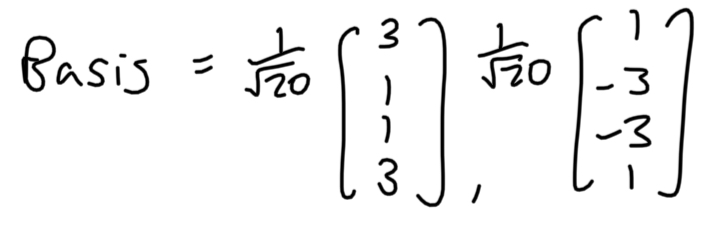





g) Identify an orthonormal basis for the space spanned by the rows of $\boldsymbol{A}$.

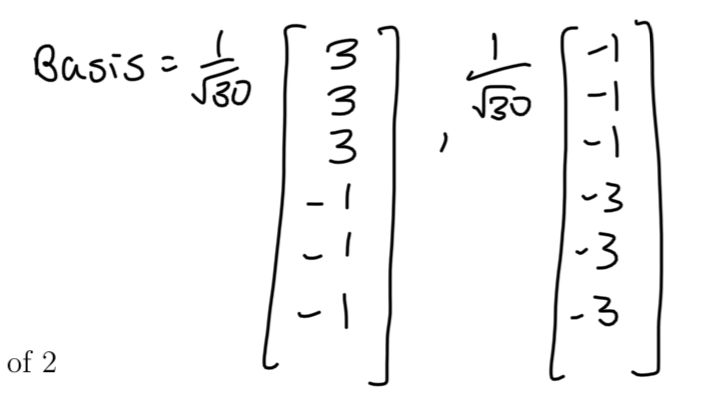

h) Define the rank-$r$ approximation to $\boldsymbol{A}$ as $\boldsymbol{A}_r = \sum_{i=1}^r \sigma_i \boldsymbol{u}_i \boldsymbol{v}_i^T$ where $\sigma_i$ is the ith singular value with left singular vector $\boldsymbol{u}_i$ and right singular vector $\boldsymbol{v}_i$.

i. Find the rank-1 approximation $\boldsymbol{A}_1$.  How does $\boldsymbol{A}_1$ compare to $\boldsymbol{A}$?

ii. Find the rank-2 approximation $\boldsymbol{A}_2$.  How does $\boldsymbol{A}_2$ compare to $\boldsymbol{A}$?

Rank 1 approximation: 
 [[2.00 2.00 2.00 -2.00 -2.00 -2.00]
 [2.00 2.00 2.00 -2.00 -2.00 -2.00]
 [2.00 2.00 2.00 -2.00 -2.00 -2.00]
 [2.00 2.00 2.00 -2.00 -2.00 -2.00]]
Rank 2 approximation: 
 [[3.00 3.00 3.00 -1.00 -1.00 -1.00]
 [1.00 1.00 1.00 -3.00 -3.00 -3.00]
 [1.00 1.00 1.00 -3.00 -3.00 -3.00]
 [3.00 3.00 3.00 -1.00 -1.00 -1.00]]


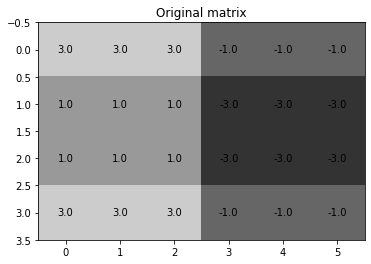

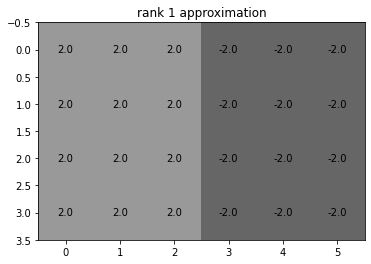

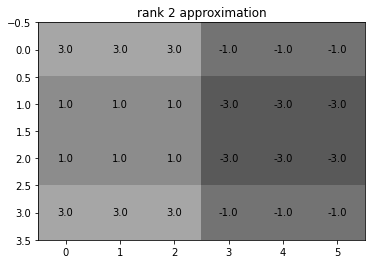

In [ ]:
A_rank_1_approx = U[:,:1]@S_matrix[:1,:1]@VT[:1,:] 
A_rank_2_approx = U[:,:2]@S_matrix[:2,:2]@VT[:2,:] 

print("Rank 1 approximation: \n", A_rank_1_approx)
print("Rank 2 approximation: \n", A_rank_2_approx)

## display the original matrix using a heatmap 
plt.figure(num=None)
for (j,i),label in np.ndenumerate(A):
    plt.text(i,j,np.round(label,1),ha='center',va='center')
plt.imshow(A, vmin=-5, vmax=5, interpolation='none', cmap='gray')
plt.title('Original matrix' )

## display the rank-r approximations using a heatmap
for r in range(1,3):
    ## Fill in the blank: choose the first r colummns of U, first r singular values, etc...
    A_rank_r_approx = U[:,:r]@S_matrix[:r,:r]@VT[:r,:] 
    plt.figure(num=None)
    for (j,i),label in np.ndenumerate(A_rank_r_approx):
        plt.text(i,j,np.round(label,1),ha='center',va='center')
    plt.imshow(A_rank_r_approx, vmin=-10, vmax=10, interpolation='none', cmap='gray')
    plt.title('rank ' + str(r) + ' approximation'  ) 

i) The economy SVD is based on the dimension of the matrices and does not consider the rank of the matrix.   What is the smallest economy SVD (minimum dimension of the square matrix $\boldsymbol{S}$) possible for the matrix $\boldsymbol{A}$?  Find $\boldsymbol{U}, \boldsymbol{S}$, and $\boldsymbol{V}$ for this minimal economy SVD.



> The smallest dimension of A is 4, therefore the smallest S possible is <br>
> S = 4 X 4 matrix <br>
> Then, the other matrices become <br>
> U = 4 X 4 matrix <br>
> V = 6 X 4 matrix

